# Problem Set 3, U-Pb ages, Concordia diagrams, and Pb-Pb plots

## Objectives: 1) understand how to construct U-Pb concordia diagrams; 2) practice with iterative solving algorithms; and 3) use Stacey-Kramer Pb-Pb plots to understand data


Let's get our useful libraries imported:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline

Introduce some constants that we'll need throughout this notebook:

In [2]:
U_atomic_mass = 238.02891 #g/mol
Th_atomic_mass = 232.0381 #g/mol

U_ratio = 1/137.88 #235U/238U
U_ratio_zircon = 1/137.818 #235U/238U

Pb206_atomic_mass = 205.97446 #g/mol
Pb207_atomic_mass = 206.97589 #g/mol
Pb208_atomic_mass = 207.97604 #g/mol

lambda_238 = 1.55125e-10 #1/yr
lambda_235 = 9.8485e-10 #1/yr
lambda_232 = 4.49475e-11 #1/yr

## Problem 1

### Most human-made nuclear reactors require ~3 % $^{235}$U enrichment (for this problem assume that 3.0 % is the exact cut-off between critical and non-critical). Calculate the last time in geologic history that natural nuclear reactors were possible.

To solve this problem, we can use the more basic form of the decay equation (but rearranged because we're actually solving for N$_0$):

$N_0 = N * e^{\lambda t}$

We'll also need to consider this equation in terms of the ratio between $^{235}$U and $^{238}$U. Solve the equation by hand first and then enter it below.

In [3]:
critical_time = np.log(0.03/U_ratio)/(lambda_235-lambda_238)
critical_time = critical_time/1000000

print(round(critical_time), ' Ma')

1711.0  Ma


## Problem 2

### Wilde et al. (2001) report the following data from their SHRIMP analyses of zircons from Jack Hills, Australia. Each row is a different ~30 μm spot in a collection of several zircons. In these samples, it is ok to assume that the common Pb, and $^{204}$Pb is negligible. Answer each part of this question below.

|U (ppm)|Th (ppm)|Pb (ppm)|$^{207}$Pb/$^{206}$Pb|$^{208}$Pb/$^{206}$Pb
|-------|--------|--------|--------|--------|
|361|262|515|0.5401|0.1743|
|258|174|351|0.5353|0.1641|
|184|117|204|0.5143|0.1612|
|250|188|333|0.5436|0.1831|
|208|304|153|0.5163|0.1959|
|346|940|182|0.5147|0.2005|
|127|75|180|0.5587|0.1437|
|329|339|337|0.5272|0.2134|

### a) Calculate $^{206}$Pb/$^{238}$U, $^{207}$Pb/$^{235}$U, $^{208}$Pb/$^{232}$Th for each spot. Don’t forget that the atomic mass of Pb is not constant in each spot (i.e., you’ll have to use the methods you employed for the Rb/Sr problem set, assume that Ab204 is 0, and remember that AbXXX are molar abundances).

First, let's set up the data frame:

In [4]:
data = {'U_ppm' : [361, 258, 184, 250, 208, 346, 127, 329], 
        'Th_ppm' : [262, 174, 117, 188, 304, 940, 75, 339], 
        'Pb_ppm' : [515, 351, 204, 333, 153, 182, 180, 337],
        'Pb207_Pb206' : [0.5401, 0.5353, 0.5143, 0.5436, 0.5163, 0.5147, 0.5587, 0.5272],
        'Pb208_Pb206' : [0.1743, 0.1641, 0.1612, 0.1831, 0.1959, 0.2005, 0.1437, 0.2134]}

#We need to define the column order if we want the DataFrame to order our columns in a particular fashion, we also
#need to include the index to complete our DataFrame
Wilde_frame = pd.DataFrame(data, columns = ['U_ppm', 'Th_ppm', 'Pb_ppm', 'Pb207_Pb206', 'Pb208_Pb206'], index = 
                        ['Spot_1', 'Spot_2', 'Spot_3', 'Spot_4', 'Spot_5', 'Spot_6', 'Spot_7', 'Spot_8'])

Wilde_frame

,U_ppm,Th_ppm,Pb_ppm,Pb207_Pb206,Pb208_Pb206
Spot_1,361,262,515,0.5401,0.1743
Spot_2,258,174,351,0.5353,0.1641
Spot_3,184,117,204,0.5143,0.1612
Spot_4,250,188,333,0.5436,0.1831
Spot_5,208,304,153,0.5163,0.1959
Spot_6,346,940,182,0.5147,0.2005
Spot_7,127,75,180,0.5587,0.1437
Spot_8,329,339,337,0.5272,0.2134


Now let's solve for the various ratios. You'll use the same procedure as we've employed for past problem sets.

In [5]:
#empty lists that we'll append to
Pb206_mol = []
Pb207_mol = []
Pb208_mol = []

#for loop that does the conversion to Pb206, Pb207, Pb208 for each spot in our DataFrame

for i in range(len(Wilde_frame)):
    #your math goes here
    #here are some useful hints, be sure to uncomment them  
    
    Ab_Pb206_spot = (1 + Wilde_frame.Pb207_Pb206[i] + Wilde_frame.Pb208_Pb206[i])**-1
    Ab_Pb207_spot = Ab_Pb206_spot * Wilde_frame.Pb207_Pb206[i]
    Ab_Pb208_spot = Ab_Pb206_spot * Wilde_frame.Pb208_Pb206[i]

    
    Pb_atomic_mass = Ab_Pb206_spot * Pb206_atomic_mass + Ab_Pb207_spot * Pb207_atomic_mass + Ab_Pb208_spot * Pb208_atomic_mass
    mol206 = Wilde_frame.Pb_ppm[i] * (1/1000000) * (1/Pb_atomic_mass) * Ab_Pb206_spot
    mol207 = Wilde_frame.Pb_ppm[i] * (1/1000000) * (1/Pb_atomic_mass) * Ab_Pb207_spot
    mol208 = Wilde_frame.Pb_ppm[i] * (1/1000000) * (1/Pb_atomic_mass) * Ab_Pb208_spot
    
    Pb206_mol.append(mol206)
    Pb207_mol.append(mol207)
    Pb208_mol.append(mol208)
    
    
#add it to the DataFrame

#try it yourself here!
Wilde_frame['Pb206_mol'] = Pb206_mol
Wilde_frame['Pb207_mol'] = Pb207_mol
Wilde_frame['Pb208_mol'] = Pb208_mol

#let's see what we've made
Wilde_frame

,U_ppm,Th_ppm,Pb_ppm,Pb207_Pb206,Pb208_Pb206,Pb206_mol,Pb207_mol,Pb208_mol
Spot_1,361,262,515,0.5401,0.1743,1.454751e-06,7.857113e-07,2.535632e-07
Spot_2,258,174,351,0.5353,0.1641,1.000292e-06,5.354563e-07,1.641479e-07
Spot_3,184,117,204,0.5143,0.1612,5.896842e-07,3.032746e-07,9.505709e-08
Spot_4,250,188,333,0.5436,0.1831,9.339059e-07,5.076713e-07,1.709982e-07
Spot_5,208,304,153,0.5163,0.1959,4.327185e-07,2.234125e-07,8.476955e-08
Spot_6,346,940,182,0.5147,0.2005,5.138280e-07,2.644673e-07,1.030225e-07
Spot_7,127,75,180,0.5587,0.1437,5.120939e-07,2.861069e-07,7.358789e-08
Spot_8,329,339,337,0.5272,0.2134,9.374803e-07,4.942396e-07,2.000583e-07


Okay, now calculate each of the daughter/parent ratios. Remember for the parents you can use natural abundances (but also remember that these are zircons).

In [6]:
#empty lists that we'll append to
Pb206_U238 = []
Pb207_U235 = []
Pb208_Th232 = []

for i in range(len(Wilde_frame)):
    U238_mol_spot = Wilde_frame.U_ppm[i] * (1/1000000) * (1/U_atomic_mass) * (1 - U_ratio_zircon)
    U235_mol_spot = Wilde_frame.U_ppm[i] * (1/1000000) * (1/U_atomic_mass) * U_ratio_zircon
    Th232_mol_spot = Wilde_frame.Th_ppm[i] * (1/1000000) * (1/Th_atomic_mass) 
    
    Pb206_U238_spot = Wilde_frame.Pb206_mol[i]/U238_mol_spot
    Pb207_U235_spot = Wilde_frame.Pb207_mol[i]/U235_mol_spot
    Pb208_Th232_spot = Wilde_frame.Pb208_mol[i]/Th232_mol_spot
    
    Pb206_U238.append(Pb206_U238_spot)
    Pb207_U235.append(Pb207_U235_spot)
    Pb208_Th232.append(Pb208_Th232_spot)
    
#add it to the data frame
Wilde_frame['Pb206_U238'] = Pb206_U238
Wilde_frame['Pb207_U235'] = Pb207_U235
Wilde_frame['Pb208_Th232'] = Pb208_Th232

#let's see what we created
Wilde_frame

,U_ppm,Th_ppm,Pb_ppm,Pb207_Pb206,Pb208_Pb206,Pb206_mol,Pb207_mol,Pb208_mol,Pb206_U238,Pb207_U235,Pb208_Th232
Spot_1,361,262,515,0.5401,0.1743,1.454751e-06,7.857113e-07,2.535632e-07,0.966216,71.398885,0.224566
Spot_2,258,174,351,0.5353,0.1641,1.000292e-06,5.354563e-07,1.641479e-07,0.929607,68.083207,0.218900
Spot_3,184,117,204,0.5143,0.1612,5.896842e-07,3.032746e-07,9.505709e-08,0.768412,54.069683,0.188520
Spot_4,250,188,333,0.5436,0.1831,9.339059e-07,5.076713e-07,1.709982e-07,0.895685,66.615949,0.211054
Spot_5,208,304,153,0.5163,0.1959,4.327185e-07,2.234125e-07,8.476955e-08,0.498809,35.235454,0.064703
Spot_6,346,940,182,0.5147,0.2005,5.138280e-07,2.644673e-07,1.030225e-07,0.356069,25.074453,0.025431
Spot_7,127,75,180,0.5587,0.1437,5.120939e-07,2.861069e-07,7.358789e-08,0.966804,73.902680,0.227669
Spot_8,329,339,337,0.5272,0.2134,9.374803e-07,4.942396e-07,2.000583e-07,0.683217,49.280747,0.136936


### b) For each spot, calculate the age for each of the chronometers in (a), as well as for $^{207}$Pb/$^{206}$Pb. The $^{207}$Pb/$^{206}$Pb age equation is transcendental. A good way to extract t from it is to construct an iterative solver algorithm with a while loop. I'll introduce that concept below (if you're familiar with the “Goal Seek” function in Excel, it's a similar concept).


Let's first do the $^{206}$Pb/$^{238}$U, $^{207}$Pb/$^{235}$U, and $^{208}$Pb/$^{232}$Th ages as those equations are straight-forward and all follow the form:

## $\frac{^{206}Pb}{^{238}U} = e^{^{238}\lambda t} - 1$

In [7]:
#empty lists that we'll append to
Pb206_U238_age = []
Pb207_U235_age = []
Pb208_Th232_age = []

for i in range(len(Wilde_frame)):
    #please calculate it in Ma!
    Pb206_U238_age_spot = np.log(Wilde_frame.Pb206_U238[i] + 1)/lambda_238 * (1/1e6)
    Pb207_U235_age_spot = np.log(Wilde_frame.Pb207_U235[i] + 1)/lambda_235 * (1/1e6)
    Pb208_Th232_age_spot = np.log(Wilde_frame.Pb208_Th232[i] + 1)/lambda_232 * (1/1e6)
    
    Pb206_U238_age.append(Pb206_U238_age_spot)
    Pb207_U235_age.append(Pb207_U235_age_spot)
    Pb208_Th232_age.append(Pb208_Th232_age_spot)
    
#add it to the data frame

Wilde_frame['Pb206_U238_age'] = Pb206_U238_age
Wilde_frame['Pb207_U235_age'] = Pb207_U235_age
Wilde_frame['Pb208_Th232_age'] = Pb208_Th232_age

#let's see what we created
Wilde_frame

,U_ppm,Th_ppm,Pb_ppm,Pb207_Pb206,Pb208_Pb206,Pb206_mol,Pb207_mol,Pb208_mol,Pb206_U238,Pb207_U235,Pb208_Th232,Pb206_U238_age,Pb207_U235_age,Pb208_Th232_age
Spot_1,361,262,515,0.5401,0.1743,1.454751e-06,7.857113e-07,2.535632e-07,0.966216,71.398885,0.224566,4358.489241,4348.064065,4507.182327
Spot_2,258,174,351,0.5353,0.1641,1.000292e-06,5.354563e-07,1.641479e-07,0.929607,68.083207,0.218900,4237.334456,4300.463699,4403.997625
Spot_3,184,117,204,0.5143,0.1612,5.896842e-07,3.032746e-07,9.505709e-08,0.768412,54.069683,0.188520,3674.983994,4070.263845,3842.461190
Spot_4,250,188,333,0.5436,0.1831,9.339059e-07,5.076713e-07,1.709982e-07,0.895685,66.615949,0.211054,4123.000816,4278.665668,4260.321220
Spot_5,208,304,153,0.5163,0.1959,4.327185e-07,2.234125e-07,8.476955e-08,0.498809,35.235454,0.064703,2608.676694,3645.263792,1394.872930
Spot_6,346,940,182,0.5147,0.2005,5.138280e-07,2.644673e-07,1.030225e-07,0.356069,25.074453,0.025431,1963.513365,3311.119482,558.718941
Spot_7,127,75,180,0.5587,0.1437,5.120939e-07,2.861069e-07,7.358789e-08,0.966804,73.902680,0.227669,4360.417165,4382.585853,4563.489863
Spot_8,329,339,337,0.5272,0.2134,9.374803e-07,4.942396e-07,2.000583e-07,0.683217,49.280747,0.136936,3356.691876,3977.887241,2855.253614


Now we can calculate the $^{207}$Pb/$^{206}$Pb age. Here's the equation:

## $\frac{^{207}Pb}{^{206}Pb} = \frac{^{235}U}{^{238}U}  \frac{(e^{^{235}\lambda t} - 1)}{(e^{^{238}\lambda t} - 1)}$

To solve this, I'll show you a commonly used form of an iterative solver that relies on a while loop and if-else selection. You will not need to manipulate the loop structure, but spend some time figuring out what it's doing. I'll leave a blank space where you need to insert the actual math.

In [8]:
#need to do this in a for loop for each spot
#empty list that we'll append to

Pb207_Pb206_age = []

for i in range(len(Wilde_frame)):
    
    #start with a time guess to get the iteration going, here we'll use the 206/238 age as the initial guess
    #need to convert to years
    t_guess = Wilde_frame.Pb206_U238_age[i] * 1e6
    
    #now, with our guess t, see how close we are to the report 207/206 ratio
    #we'll report in terms of a percent precision
    
    guess_207Pb_206Pb = U_ratio_zircon * (np.exp(lambda_235 * t_guess) - 1)/(np.exp(lambda_238 * t_guess) - 1)
    precision = 100*abs(guess_207Pb_206Pb-Wilde_frame.Pb207_Pb206[i])/Wilde_frame.Pb207_Pb206[i]
    
    #We want to improve this precision to .001%, to do that we'll use a while loop structure.
    #This while loop keeps "guessing" until the level of precision that we designate is achieved.
    #To facilitate the guessing, we also use an if, else if (elif) setup.
    
    #If the difference between our guess and correct answer is positive, the loop sets the guess as the new "high"
    #value and takes the midpoint between our old guess and this new high point and then iterates again.
    #If the difference between our guess and the correct answer is negative, the loop sets the guess as the new
    #"low" value and takes the midpoint and iterates. The power of the while loop is that it will keep doing this
    #until it has "found" the answer to a certain precision.
    
    #We need to set two initial conditions to get our guessing going, basically the absolute bounds on our guessing
    t_guess_high = 4550 * 1e6
    t_guess_low = 0

    while precision > 0.001:
        
        if (guess_207Pb_206Pb - Wilde_frame.Pb207_Pb206[i]) > 0:
            t_guess_high = t_guess
            t_guess = (t_guess_low + t_guess_high)/2
        elif (guess_207Pb_206Pb - Wilde_frame.Pb207_Pb206[i]) < 0:
            t_guess_low = t_guess
            t_guess = (t_guess_low + t_guess_high)/2
        
        #Finally, we recalculate the 207/206 ratio with our new t guess, and see if the precision is close enough.
        #If not, the while loop will continue
        
        #Your math goes here. BUT BUT BUT! Be careful how you set this up as it's possible to have the while loop
        #iterate infinitely. You'll know it's done that because you won't see a result output, which should happen
        #almost instantaneously if you've done it correctly. If you do find yourself in an infinite loop, use the
        #stop button next to the run button to arrest the notebook's kernel.
        
        guess_207Pb_206Pb = U_ratio_zircon * (np.exp(lambda_235 * t_guess) - 1)/(np.exp(lambda_238 * t_guess) - 1)
        precision = 100*abs(guess_207Pb_206Pb-Wilde_frame.Pb207_Pb206[i])/Wilde_frame.Pb207_Pb206[i]
    
    #don't forget to add this iterative solution to the list!
    #please report in Ma!
    Pb207_Pb206_age.append(t_guess * (1/1e6))
    
#and don't forget to add the list to the data frame!
Wilde_frame['Pb207_Pb206_age'] = Pb207_Pb206_age

#let's see how we did

Wilde_frame


,U_ppm,Th_ppm,Pb_ppm,Pb207_Pb206,Pb208_Pb206,Pb206_mol,Pb207_mol,Pb208_mol,Pb206_U238,Pb207_U235,Pb208_Th232,Pb206_U238_age,Pb207_U235_age,Pb208_Th232_age,Pb207_Pb206_age
Spot_1,361,262,515,0.5401,0.1743,1.454751e-06,7.857113e-07,2.535632e-07,0.966216,71.398885,0.224566,4358.489241,4348.064065,4507.182327,4353.900378
Spot_2,258,174,351,0.5353,0.1641,1.000292e-06,5.354563e-07,1.641479e-07,0.929607,68.083207,0.218900,4237.334456,4300.463699,4403.997625,4340.824766
Spot_3,184,117,204,0.5143,0.1612,5.896842e-07,3.032746e-07,9.505709e-08,0.768412,54.069683,0.188520,3674.983994,4070.263845,3842.461190,4282.058392
Spot_4,250,188,333,0.5436,0.1831,9.339059e-07,5.076713e-07,1.709982e-07,0.895685,66.615949,0.211054,4123.000816,4278.665668,4260.321220,4363.370291
Spot_5,208,304,153,0.5163,0.1959,4.327185e-07,2.234125e-07,8.476955e-08,0.498809,35.235454,0.064703,2608.676694,3645.263792,1394.872930,4287.783906
Spot_6,346,940,182,0.5147,0.2005,5.138280e-07,2.644673e-07,1.030225e-07,0.356069,25.074453,0.025431,1963.513365,3311.119482,558.718941,4283.205419
Spot_7,127,75,180,0.5587,0.1437,5.120939e-07,2.861069e-07,7.358789e-08,0.966804,73.902680,0.227669,4360.417165,4382.585853,4563.489863,4403.438953
Spot_8,329,339,337,0.5272,0.2134,9.374803e-07,4.942396e-07,2.000583e-07,0.683217,49.280747,0.136936,3356.691876,3977.887241,2855.253614,4318.461516


### c) Hopefully you noticed that some of these ages are not internally consistent for many spots. Confirm which spots are actually concordant by plotting these data on a concordia diagram. We'll use the Wetherill Concordia diagram for this excercise.

The approach to this will be similar to the one we used for the Sm-Nd problem set and epsilon Nd plots.

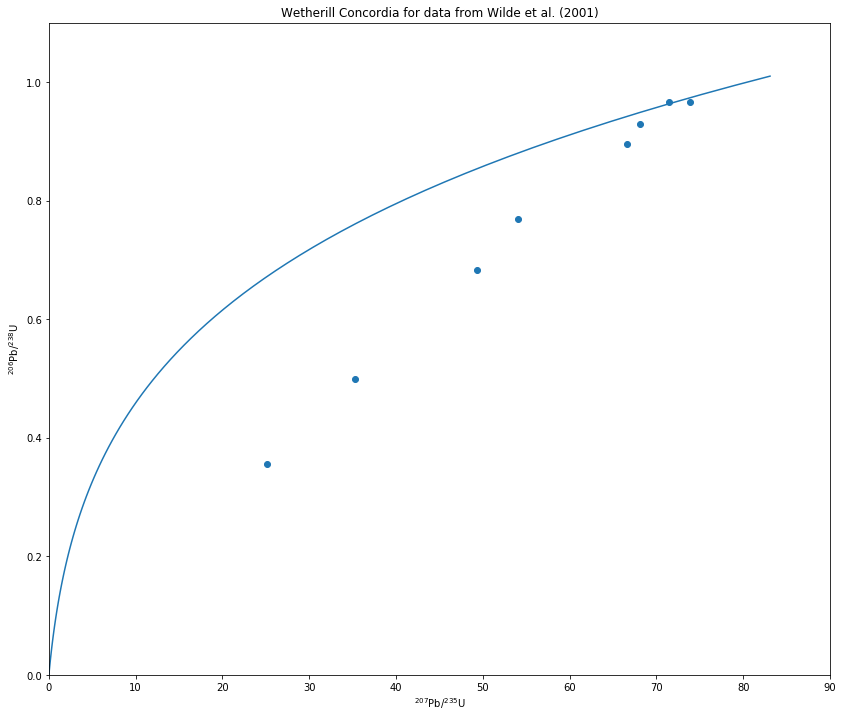

In [9]:
#set up the plot

plt.figure(figsize = (14, 12))
plt.xlabel('$^{207}$Pb/$^{235}$U')
plt.ylabel('$^{206}$Pb/$^{238}$U')
plt.xlim(0, 90)
plt.ylim(0, 1.1)
plt.title('Wetherill Concordia for data from Wilde et al. (2001)')

#plot up these data
#use plt.scatter() 
plt.scatter(Wilde_frame.Pb207_U235, Wilde_frame.Pb206_U238)

#plot the concordia diagram
#use a discretized array of age values to do this (from 0 to 4.55 Ga, don't forget to make sure units match though!)
#x_vals are the 207/235 ratios, y_vals are the 206/238 ratios
time_vals = np.arange(0, 4.55, 0.05)
x_vals = np.exp(lambda_235 * time_vals * 1e9) - 1
y_vals = np.exp(lambda_238 * time_vals * 1e9) - 1

plt.plot(x_vals, y_vals)
plt.show()

## Problem 3

### Plot the $^{206}$Pb/$^{204}$Pb vs. $^{207}$Pb/$^{204}$Pb evolution of Pb for the 1975 Stacey-Kramers model, from 4.57 Ga to present. Parameters and equations are listed below. Show the extension of the first stage compositions to the present day, as well as the second stage.

### $\frac{^{206}Pb}{^{204}Pb} = (\frac{^{206}Pb}{^{204}Pb})_{T} + (\frac{^{238}U}{^{204}Pb})_{T} (e^{^{238}\lambda T} - e^{^{238}\lambda t})$

### $\frac{^{207}Pb}{^{204}Pb} = (\frac{^{207}Pb}{^{204}Pb})_{T} + (\frac{^{238}U}{^{204}Pb})_{T} \frac{^{235}U}{^{238}U} (e^{^{238}\lambda T} - e^{^{238}\lambda t})$

### where T = 4.57 Ga for first stage and 3.70 Ga for second stage, $\frac{^{206}Pb}{^{204}Pb}_{T}$ = 9.307 for first stage and 11.152 for second stage, $\frac{^{207}Pb}{^{204}Pb}_{T}$ = 10.294 for first stage and 12.998 for second stage, and $\frac{^{238}U}{^{204}Pb}_{T}$ = 7.192 for first stage and 9.735 for second stage.

First let's plot the data, we can use a very similar syntax to the one from the previous problem. I'll let you do most of the setup here.

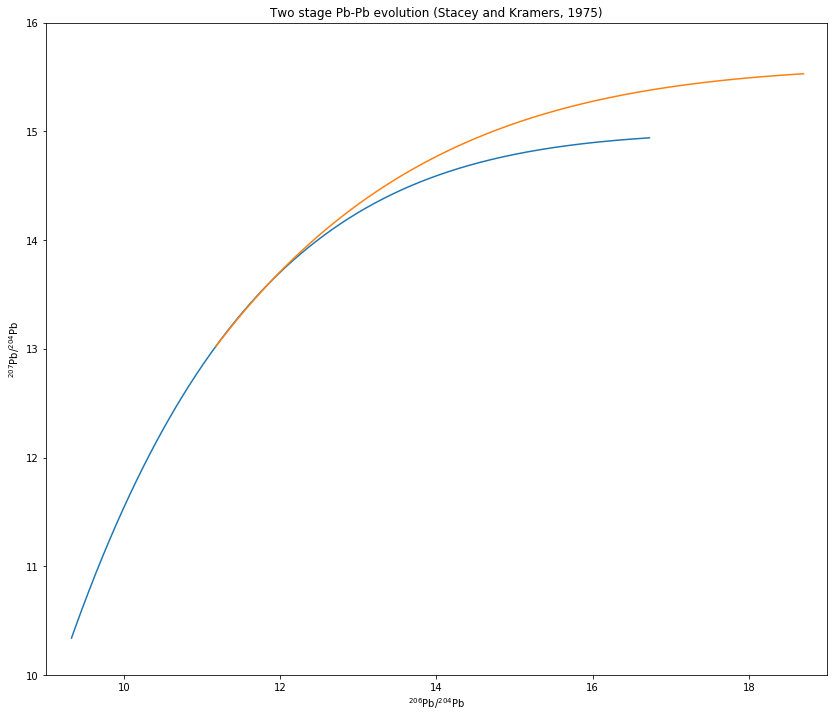

In [10]:
plt.figure(figsize = (14, 12))
plt.xlabel('$^{206}$Pb/$^{204}$Pb')
plt.ylabel('$^{207}$Pb/$^{204}$Pb')
plt.xlim(9, 19)
plt.ylim(10, 16)
plt.title('Two stage Pb-Pb evolution (Stacey and Kramers, 1975)')

#plot the two-stage lines
#use two separate discretized array of age values to do this 
#(from 0 to 4.57 Ga for stage one, 0 to 3.7 Ga for stage two, don't forget to make sure units match though!)
#x_vals are the 206/204 ratios, y_vals are the 207/204 ratios
time_vals_1 = np.arange(0, 4.57, 0.01)
time_vals_2 = np.arange(0, 3.70, 0.01)
x_vals_1 = 9.307 + 7.192 * (np.exp(lambda_238 * 4.57 * 1e9) - np.exp(lambda_238 * time_vals_1 * 1e9))
y_vals_1 = 10.294 + 7.192 * U_ratio * (np.exp(lambda_235 * 4.57 * 1e9) - np.exp(lambda_235 * time_vals_1 * 1e9))
x_vals_2 = 11.152 + 9.735 * (np.exp(lambda_238 * 3.7 * 1e9) - np.exp(lambda_238 * time_vals_2 * 1e9))
y_vals_2 = 12.998 + 9.375 * U_ratio * (np.exp(lambda_235 * 3.7 * 1e9) - np.exp(lambda_235 * time_vals_2 * 1e9))

plt.plot(x_vals_1, y_vals_1)
plt.plot(x_vals_2, y_vals_2)
plt.show()

## Problem 4

### Leeman et al. (1985) reported Pb isotope data for a suite of deep crustal xenoliths from the Snake River Plain (below). Here are the data:

|Sample|$^{206}$Pb/$^{204}$Pb|$^{207}$Pb/$^{204}$Pb|
|-------|--------|--------|
|1|17.75|15.55|
|2|16.73|15.45|
|3|14.18|14.98|
|4|14.80|14.81|
|5|16.23|15.32|
|6|14.95|15.18|
|7|17.81|15.60|
|8|16.09|15.64|
|9|14.11|14.82|
|10|13.43|14.68|
|11|13.56|14.72|
|12|19.02|15.75|
|13|16.36|15.50|
|14|24.65|16.87|
|15|18.76|15.88|

### a) Plot these data along with the Stacey-Kramer Pb isotope evolution trends.

You can recycle the work you did up above in problem 3 for this first part, then simple add the points. But first you'll need to put these data into a data frame. I'll let you do the setup this time.

In [11]:
data = {'Pb206_Pb204' : [17.75, 16.73, 14.18, 14.80, 16.23, 14.95, 17.81, 16.09, 14.11, 13.43, 13.56, 19.02, 16.36, 24.65, 18.76],
        'Pb207_Pb204' : [15.55, 15.45, 14.98, 14.81, 15.32, 15.18, 15.60, 15.64, 14.82, 14.68, 14.72, 15.75, 15.50, 16.87, 15.88]}

#We need to define the column order if we want the DataFrame to order our columns in a particular fashion, we also
#need to include the index to complete our DataFrame
Leeman_frame = pd.DataFrame(data, columns = ['Pb206_Pb204', 'Pb207_Pb204'], index = 
                        ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15'])

Leeman_frame

,Pb206_Pb204,Pb207_Pb204
1,17.75,15.55
2,16.73,15.45
3,14.18,14.98
4,14.80,14.81
5,16.23,15.32
6,14.95,15.18
7,17.81,15.60
8,16.09,15.64
9,14.11,14.82
10,13.43,14.68


Now create the plot. Again, I'll leave this up to you. Make sure you size the axes correctly though so that all points are visible!

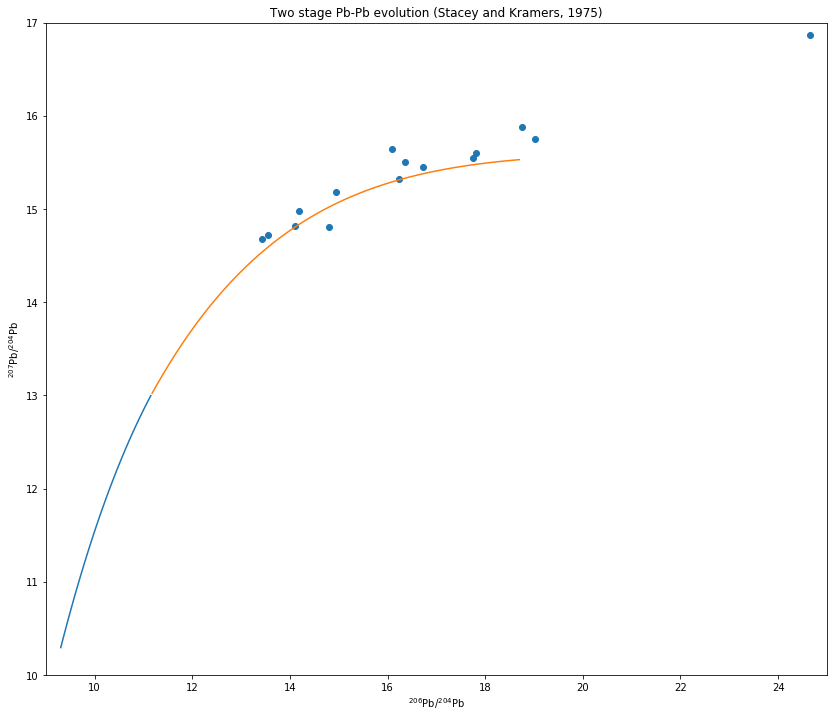

In [12]:
plt.figure(figsize = (14, 12))
plt.xlabel('$^{206}$Pb/$^{204}$Pb')
plt.ylabel('$^{207}$Pb/$^{204}$Pb')
plt.xlim(9, 25)
plt.ylim(10, 17)
plt.title('Two stage Pb-Pb evolution (Stacey and Kramers, 1975)')

#plot the two-stage lines
#use two separate discretized array of age values to do this 
#(from 0 to 4.57 Ga for stage one, 0 to 3.7 Ga for stage two, don't forget to make sure units match though!)
#x_vals are the 206/204 ratios, y_vals are the 207/204 ratios
time_vals_1 = np.arange(3.70, 4.57, 0.01)
time_vals_2 = np.arange(0, 3.70, 0.01)
x_vals_1 = 9.307 + 7.192 * (np.exp(lambda_238 * 4.57 * 1e9) - np.exp(lambda_238 * time_vals_1 * 1e9))
y_vals_1 = 10.294 + 7.192 * U_ratio * (np.exp(lambda_235 * 4.57 * 1e9) - np.exp(lambda_235 * time_vals_1 * 1e9))
x_vals_2 = 11.152 + 9.735 * (np.exp(lambda_238 * 3.7 * 1e9) - np.exp(lambda_238 * time_vals_2 * 1e9))
y_vals_2 = 12.998 + 9.375 * U_ratio * (np.exp(lambda_235 * 3.7 * 1e9) - np.exp(lambda_235 * time_vals_2 * 1e9))

plt.plot(x_vals_1, y_vals_1)
plt.plot(x_vals_2, y_vals_2)
plt.scatter(Leeman_frame.Pb206_Pb204, Leeman_frame.Pb207_Pb204)
plt.show()

### b) Calculate an age for these xenoliths using a Pb-Pb isochron and plot the point on the S-K model trend representing this age.

Create the isochron plot first use the setups you've employed in previous problem sets. 

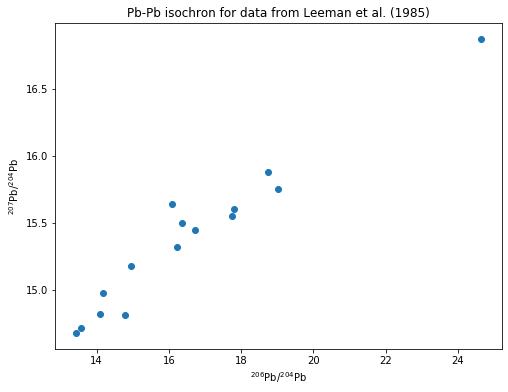

In [34]:
plt.figure(figsize = (8, 6))
plt.xlabel('$^{206}$Pb/$^{204}$Pb')
plt.ylabel('$^{207}$Pb/$^{204}$Pb')
plt.title('Pb-Pb isochron for data from Leeman et al. (1985)')

#include the line below that will actually plot up these data
#use plt.scatter()
plt.scatter(Leeman_frame.Pb206_Pb204, Leeman_frame.Pb207_Pb204)

plt.show()

Next, calculate an age for this isochron. You can use the unweighted, ordinary linear regression approach. This process will involve both ordinary regression function you wrote for the first problem set, and the iterative solver algorithm described up above. Let's start with copying and pasting the function in the cell below.

In [14]:
def ord_lin_regress(X_vals, Y_vals):
    
    #hint: it helps to create arrays for XY values and X^2 (use x**2 to raise something to a power) from your input
    #first create some empty arrays
    
    XY_vals = []
    X2_vals = []
    
    #then try this for loop (remember that Python uses zero indexing):
    
    for i in range(len(X_vals)):
        XY = X_vals[i] * Y_vals[i]
        X2 = X_vals[i]**2
        
        XY_vals.append(XY)
        X2_vals.append(X2)
        
    #now calculate slope and intercept below using the sum function, I'll let you try the math here
    
    slope = (sum(XY_vals)-(sum(X_vals)*sum(Y_vals)/len(X_vals)))/(sum(X2_vals)-(sum(X_vals)**2)/len(X_vals))
    intercept = (sum(X_vals)*sum(XY_vals)-sum(Y_vals)*sum(X2_vals))/(sum(X_vals)**2-len(X_vals)*sum(X2_vals))
    
    return slope, intercept

Then, calculate the slope and save it to the variable Pb_slope

In [15]:
isochron = ord_lin_regress(Leeman_frame.Pb206_Pb204, Leeman_frame.Pb207_Pb204)
Pb_slope = isochron[0]

print('The Pb-Pb isochron slope is ', Pb_slope)

The Pb-Pb isochron slope is  0.19200065176242787


Now we're ready to try to iteratively solve the Pb-Pb age equation. Remember that the slope of the Pb-Pb isochron is:

### $m = \frac{^{235}U}{^{238}U}  \frac{(e^{^{235}\lambda t} - 1)}{(e^{^{238}\lambda t} - 1)}$

I'll help you out by giving the while loop structure again, but it'll be up to you to do the math in the correct spot.

In [24]:
#start with some rough guess of age, make sure it's the correct units
Pb_age_guess = 3.0 * 1e9

#with our age guess, see how close we are to the slope we got in the previous cell
#we'll report in terms of a percent precision
    
guess_slope = U_ratio * (np.exp(lambda_235 * Pb_age_guess) - 1)/(np.exp(lambda_238 * Pb_age_guess) - 1)
precision = 100*abs(guess_slope - Pb_slope)/Pb_slope


#We need to set two initial conditions to get our guessing going, basically the absolute bounds on our guessing
age_guess_high = 4.55 * 1e9
age_guess_low = 0

while precision > 0.001:
       
    if (guess_slope - Pb_slope) > 0:
        age_guess_high = Pb_age_guess
        Pb_age_guess = (age_guess_low + age_guess_high)/2
    elif (guess_slope - Pb_slope) < 0:
        age_guess_low = Pb_age_guess
        Pb_age_guess = (age_guess_low + age_guess_high)/2
        
    #Finally, we recalculate the 207/206 ratio with our new t guess, and see if the precision is close enough.
    #If not, the while loop will continue
        
    #Your math goes here. BUT BUT BUT! Be careful how you set this up as it's possible to have the while loop
    #iterate infinitely. You'll know it's done that because you won't see a result output, which should happen
    #almost instantaneously if you've done it correctly. If you do find yourself in an infinite loop, use the
    #stop button next to the run button to arrest the notebook's kernel.
        
    guess_slope = U_ratio * (np.exp(lambda_235 * Pb_age_guess) - 1)/(np.exp(lambda_238 * Pb_age_guess) - 1)
    precision = 100*abs(guess_slope - Pb_slope)/Pb_slope

#print out the age in Ma 
print('The Pb-Pb isochron age is ', round(Pb_age_guess/1e6), ' Ma')

The Pb-Pb isochron age is  2759  Ma
2759376525.8789062


Finally, calculate the Pb-Pb ratios at this age and add it to the Pb-Pb plot. I've added the one line of code here that will create the point and make it a different shape and color than the other points. I'll let you copy and paste the rest from your work up above. Use the second stage constants listed above in the introduction to problem 3 (because we're beyond 3.7 Ga).

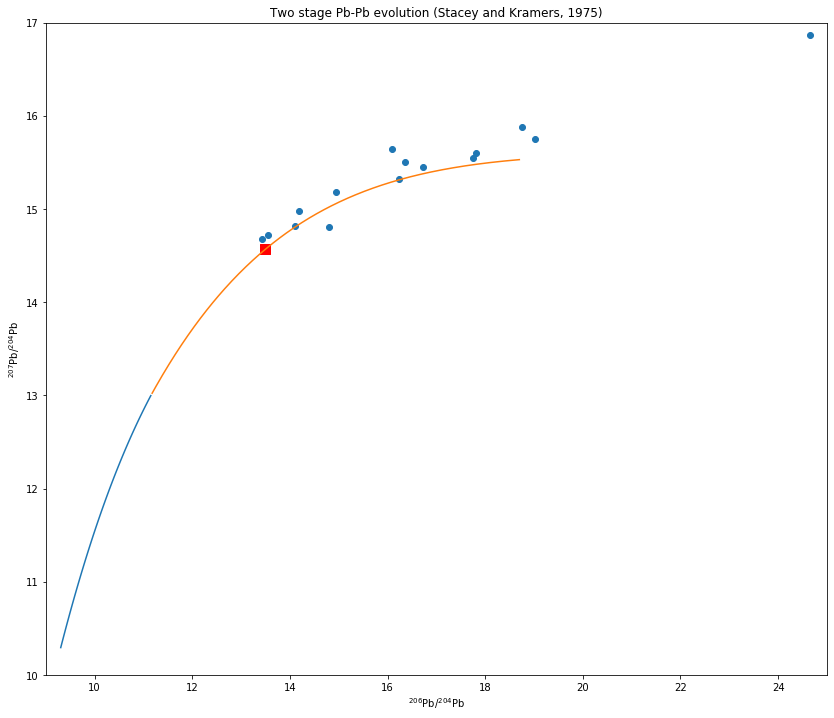

In [33]:
#calculate the point here
Pb_x_val = 11.152 + 9.735 * (np.exp(lambda_238 * 3.7 * 1e9) - np.exp(lambda_238 * Pb_age_guess))
Pb_y_val = 12.998 + 9.375 * U_ratio * (np.exp(lambda_235 * 3.7 * 1e9) - np.exp(lambda_235 * Pb_age_guess))

plt.figure(figsize = (14, 12))
plt.xlabel('$^{206}$Pb/$^{204}$Pb')
plt.ylabel('$^{207}$Pb/$^{204}$Pb')
plt.xlim(9, 25)
plt.ylim(10, 17)
plt.title('Two stage Pb-Pb evolution (Stacey and Kramers, 1975)')

#plot the two-stage lines
#use two separate discretized array of age values to do this 
#(from 0 to 4.57 Ga for stage one, 0 to 3.7 Ga for stage two, don't forget to make sure units match though!)
#x_vals are the 206/204 ratios, y_vals are the 207/204 ratios
time_vals_1 = np.arange(3.70, 4.57, 0.01)
time_vals_2 = np.arange(0, 3.70, 0.01)
x_vals_1 = 9.307 + 7.192 * (np.exp(lambda_238 * 4.57 * 1e9) - np.exp(lambda_238 * time_vals_1 * 1e9))
y_vals_1 = 10.294 + 7.192 * U_ratio * (np.exp(lambda_235 * 4.57 * 1e9) - np.exp(lambda_235 * time_vals_1 * 1e9))
x_vals_2 = 11.152 + 9.735 * (np.exp(lambda_238 * 3.7 * 1e9) - np.exp(lambda_238 * time_vals_2 * 1e9))
y_vals_2 = 12.998 + 9.375 * U_ratio * (np.exp(lambda_235 * 3.7 * 1e9) - np.exp(lambda_235 * time_vals_2 * 1e9))

plt.plot(x_vals_1, y_vals_1)
plt.plot(x_vals_2, y_vals_2)
plt.scatter(Leeman_frame.Pb206_Pb204, Leeman_frame.Pb207_Pb204)                            

#here's the one line to make this a unique point, but you'll have to build the rest of the figure around it
#this makes it a red square of size 120
plt.scatter(Pb_x_val, Pb_y_val, marker = "s", c = "r", s=120)
                                       
plt.show()

### c) How do you intrepret the significance of the isochron Pb-Pb point as it relates to the rest of the data set? Provide a geologic explanation for the observation from the above plot